In [1]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

## Download datasets

In [2]:
!wget https://lp-prod-resources.s3.amazonaws.com/627/66527/2021-09-10-16-03-17/Covid19Study_June2021.csv

--2023-02-06 11:16:17--  https://lp-prod-resources.s3.amazonaws.com/627/66527/2021-09-10-16-03-17/Covid19Study_June2021.csv
Resolving lp-prod-resources.s3.amazonaws.com (lp-prod-resources.s3.amazonaws.com)... 52.92.209.49, 52.218.219.67, 52.92.179.17, ...
Connecting to lp-prod-resources.s3.amazonaws.com (lp-prod-resources.s3.amazonaws.com)|52.92.209.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2122 (2.1K) [application/octet-stream]
Saving to: ‘Covid19Study_June2021.csv’

Covid19Study_June20 100%[===================>]   2.07K  --.-KB/s    in 0s      

2023-02-06 11:16:19 (11.1 MB/s) - ‘Covid19Study_June2021.csv’ saved [2122/2122]



In [3]:
!wget https://lp-prod-resources.s3.amazonaws.com/627/66527/2021-09-10-16-04-11/Recordings.zip
!unzip Recordings.zip
!rm Recordings.zip

--2023-02-06 11:16:19--  https://lp-prod-resources.s3.amazonaws.com/627/66527/2021-09-10-16-04-11/Recordings.zip
Resolving lp-prod-resources.s3.amazonaws.com (lp-prod-resources.s3.amazonaws.com)... 52.92.148.201, 52.218.219.67, 52.92.179.17, ...
Connecting to lp-prod-resources.s3.amazonaws.com (lp-prod-resources.s3.amazonaws.com)|52.92.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62506055 (60M) [application/octet-stream]
Saving to: ‘Recordings.zip’

Recordings.zip       64%[===========>        ]  38.53M   173KB/s    in 80s     

2023-02-06 11:17:41 (496 KB/s) - Read error at byte 40406501/62506055 (Connection reset by peer). Retrying.

--2023-02-06 11:17:42--  (try: 2)  https://lp-prod-resources.s3.amazonaws.com/627/66527/2021-09-10-16-04-11/Recordings.zip
Connecting to lp-prod-resources.s3.amazonaws.com (lp-prod-resources.s3.amazonaws.com)|52.92.148.201|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 62506055 

  inflating: Recordings/RecordingParticipant216.wav  
  inflating: Recordings/RecordingParticipant218.wav  
  inflating: Recordings/RecordingParticipant219.wav  
  inflating: Recordings/RecordingParticipant220.wav  
  inflating: Recordings/RecordingParticipant221.wav  
  inflating: Recordings/RecordingParticipant22.wav  
  inflating: Recordings/RecordingParticipant223.wav  
  inflating: Recordings/RecordingParticipant224.wav  
  inflating: Recordings/RecordingParticipant225.wav  
  inflating: Recordings/RecordingParticipant226.wav  
  inflating: Recordings/RecordingParticipant222.wav  
  inflating: Recordings/RecordingParticipant229.wav  
  inflating: Recordings/RecordingParticipant228.wav  
  inflating: Recordings/RecordingParticipant23.wav  
  inflating: Recordings/RecordingParticipant231.wav  
  inflating: Recordings/RecordingParticipant230.wav  
  inflating: Recordings/RecordingParticipant232.wav  
  inflating: Recordings/RecordingParticipant227.wav  
  inflating: Recordings/Record

  inflating: Recordings/Recordings.zip  
  inflating: Recordings/RecordingParticipant99.wav  


In [4]:
# use the style on ggplot2 - the grammar of graphics!
plt.style.use('ggplot')

# define figure size in (width, height) for all plots
plt.rcParams['figure.figsize'] = [10, 7]

In [5]:
# import CSV file: here the separator is a semi-colon
covid19_parts = pd.read_csv("Covid19Study_June2021.csv", sep = ";", 
                            dtype = {"ParticipantID":np.int32,"Age":np.int32,"Sex":np.str_,"Covid19":np.object_})

In [6]:
# see the first five observations
covid19_parts.head()

,ParticipantID,Age,Sex,Covid19
0,1,29,f,y
1,2,40,m,y
2,3,37,f,n
3,4,40,m,n
4,5,16,m,y


In [7]:
# specify types to be categories for Sex and Covid19
covid19_parts['Covid19'] = covid19_parts['Covid19'].astype("category")
covid19_parts['Sex'] = covid19_parts['Sex'].astype("category")
covid19field = covid19_parts['Covid19']

In [8]:
# confirm the data types
covid19_parts.dtypes

ParticipantID       int32
Age                 int32
Sex              category
Covid19          category
dtype: object

## Task read in the data make use of Ipywidgets

In [9]:
samplerate, data = wavfile.read("Recordings/RecordingParticipant1.wav")

length = data.shape[0] / samplerate

print(f"length = {length}s")
print(f"length = {samplerate}s")

length = 0.9070294784580499s
length = 44100s


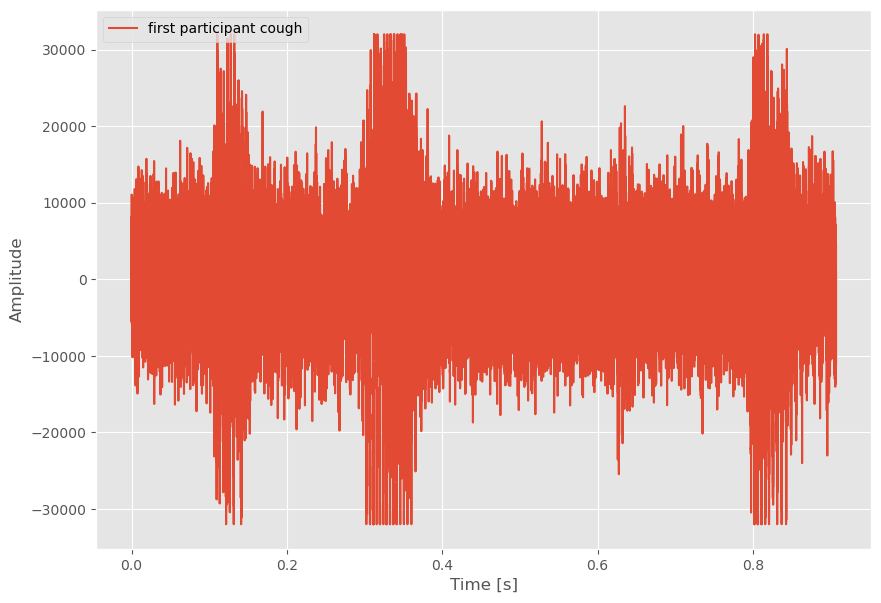

In [10]:
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="first participant cough")

plt.legend()

plt.xlabel("Time [s]")

plt.ylabel("Amplitude")

plt.show()

## Task plot a histogram attribute covid19

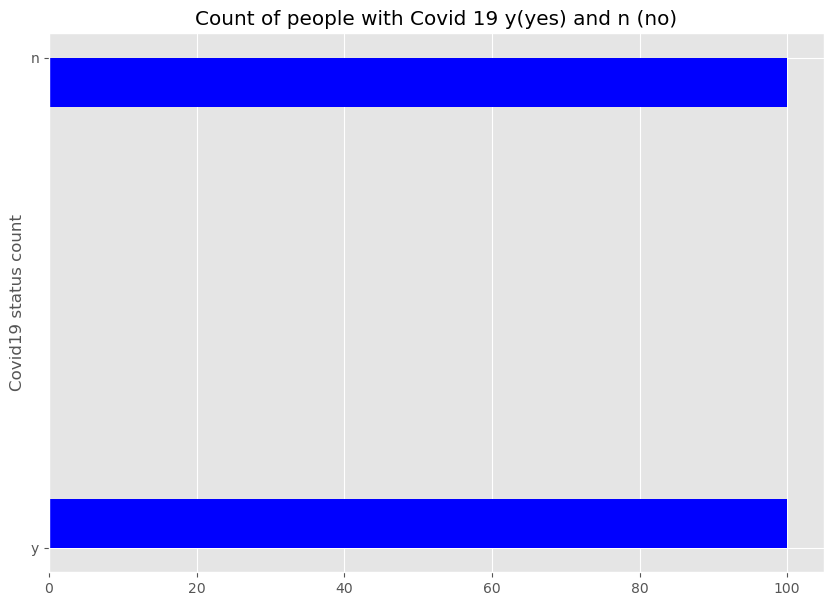

In [11]:
plt.hist(x=covid19_parts["Covid19"], orientation="horizontal", color=["blue"])

plt.title("Count of people with Covid 19 y(yes) and n (no)")

plt.ylabel("Covid19 status count")

plt.show()

Interpretation: Equal number of participants of people who either have COVID or not.

## Task plot a histogram attribute Age: For the “Age” histogram use the three intervals 0-30, or 31-50 or >50

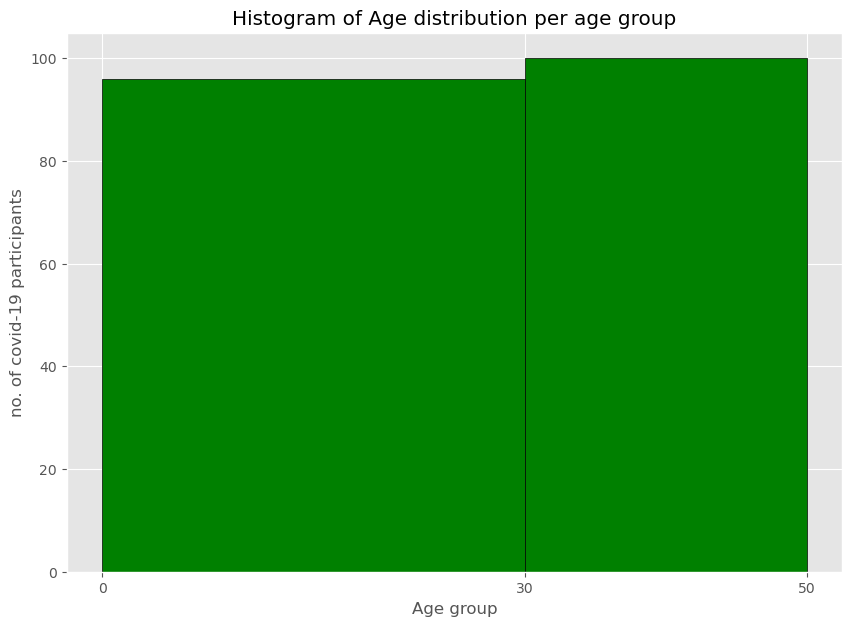

In [12]:
#https://www.tutorialspoint.com/matplotlib/matplotlib_histogram.htm
# this is incorrect
fig,ax = plt.subplots(1,1)
ax.hist(covid19_parts['Age'], bins = [0,30,50], edgecolor="black", color=["green"])
ax.set_title("Histogram of Age distribution per age group")
ax.set_xticks([0,30,50])
ax.set_xlabel('Age group')
ax.set_ylabel('no. of covid-19 participants')
plt.show()

[ 96 100   4]


Text(0, 0.5, 'no. of covid-19 participants (count)')

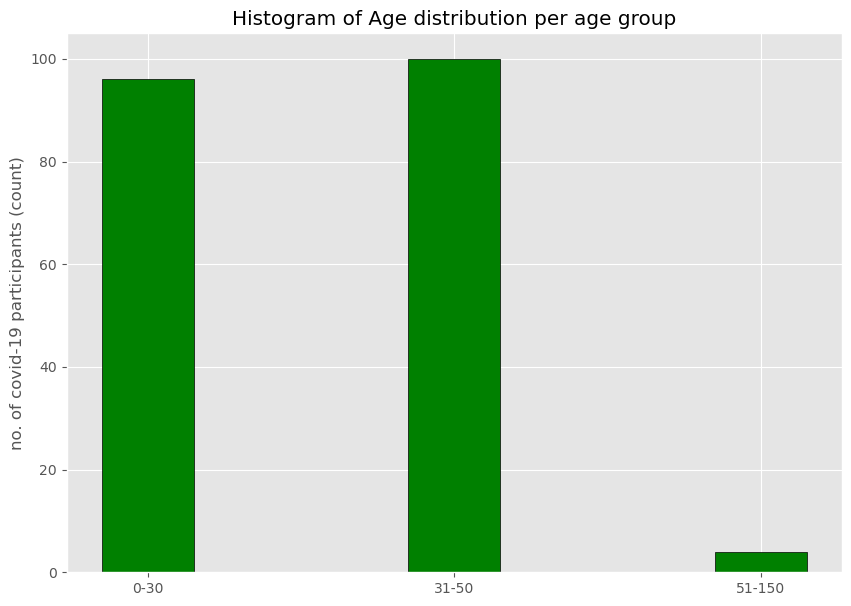

In [13]:
#%matplotlib notebook
# subset the age column
ages = covid19_parts['Age']

# use numpy histogram to create the histogram
hist_range =np.histogram(ages,[0,30,50,150])

# extract values from the hist_range 
hist_range = hist_range[0]

# get index values
x = np.arange(len(hist_range))

print(hist_range)

# what the age groups that we need to define
agegroups = ['0-30', '31-50', '51-150']

# create a figure and axis for plt.subplot
fig, ax = plt.subplots()

# define plot x,y, height, xlabel and color
rects1 = ax.bar(x,hist_range, 0.3, label="Age Groups", color="green", edgecolor="black")

# setting aesthetics
ax.set_xticks(x)
ax.set_xticklabels(agegroups)
ax.set_title("Histogram of Age distribution per age group")
ax.set_ylabel('no. of covid-19 participants (count)')

Interpretation: They are more people who participated whose age ranges between 30-50.

## Task Create a single plot with horizontal axis representing the sampling instants 0,1,…,8191 and that contains four curves. These curves should represent the last 8192 audio samples of the recordings for the first four participants listed in Covid19Study_June2021.csv.

In [14]:
# multiple plots in one for the first 4 participants
# see the first 4 part
covid19_parts.iloc[0:4]

,ParticipantID,Age,Sex,Covid19
0,1,29,f,y
1,2,40,m,y
2,3,37,f,n
3,4,40,m,n


In [15]:
sample_rate1,participant1_data = wavfile.read("Recordings/RecordingParticipant1.wav")
sample_rate2,participant2_data = wavfile.read("Recordings/RecordingParticipant2.wav")
sample_rate3,participant3_data = wavfile.read("Recordings/RecordingParticipant3.wav")
sample_rate4,participant4_data = wavfile.read("Recordings/RecordingParticipant4.wav")

In [16]:
length1 = participant1_data.shape[0] / sample_rate1
length2 = participant2_data.shape[0] / sample_rate2
length3 = participant3_data.shape[0] / sample_rate3
length4 = participant4_data.shape[0] / sample_rate4

In [17]:
time1 = np.linspace(0., length1, participant1_data.shape[0])
time2 = np.linspace(0., length2, participant2_data.shape[0])
time3 = np.linspace(0., length3, participant3_data.shape[0])
time4 = np.linspace(0., length4, participant4_data.shape[0])

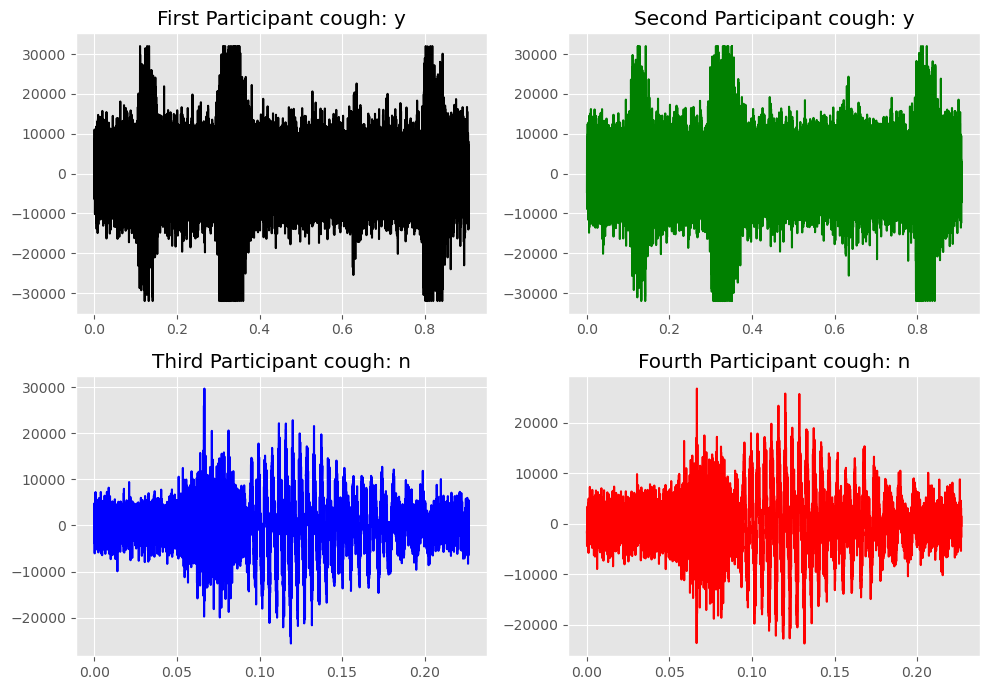

In [18]:
# adjust plot features
fig,ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].plot(time1, participant1_data, color="black")
ax[0,1].plot(time2, participant2_data, color = "green")
ax[1,0].plot(time3, participant3_data, color = "blue")
ax[1,1].plot(time4, participant4_data, color = "red")

ax[0, 0].set_title('First Participant cough: {}'.format(covid19_parts.Covid19.iloc[0]))
ax[0, 1].set_title('Second Participant cough: {}'.format(covid19_parts.Covid19.iloc[1]))
ax[1, 0].set_title('Third Participant cough: {}'.format(covid19_parts.Covid19.iloc[2]))
ax[1, 1].set_title('Fourth Participant cough: {}'.format(covid19_parts.Covid19.iloc[3]))


plt.tight_layout()

Interpretation: There seems to be a pattern with the participants who have covid 19. At least for the first 4 participants.

# Extract Features and Labels for Individuals

Here we make the X (Feature) and the label columns via feature engineering. The X consists of 200 rows and 4 columns which corresponds to each ParticipantID audiowave forms of their coughs on spectrum values between 400,600,800, & 100. The fourier transform was used to reduce the dimensionality of the dataset. Where as the target variable, is whether the patient has COVID-19 or not. An alternate explanation coming up.

We now construct a feature vector for each participant listed in `Covid19Study_June2021.csv` using the Fourier transform of the audio recording stored in the corresponding wav file. For each participant, there is a separate wav file. Let us denote the audio recording of a participant by $x[0],\ldots,x[N-1]$ with $N=8192$. The signal values $x[0],\ldots,x[N-1]$ are obtained from the last $N$ signal samples stored in the corresponding wav file. 

A popular construction for the features of audio recordings is via the discrete Fourier transform 
$$X[k] = \sum_{n=0}^{N-1} x[n] \exp( - j 2 \pi n k /N).$$ 
We then form the features characterizing the participant by normalized absolute values $(1/c) |X[k]|$ for $k=400,600,800,1000$ with the normalization constant $c = \max_{k=0,\ldots,N-1} |X[k]|$. 

We then store the feature vectors of all participants listed in `Covid19Study_June2021.csv` in the rows of the numpy array `X` with shape `(m,n)` where `n` is the length of the feature vectors. The code snippet also creates a numpy array `y` with shape `(m,1)`. The j-th entry of `y` is set to 1 if the corresponding individuals has value `y` for the attribute "Covid19". 

In [19]:
# get the directory where the recordings are
pathbase = os.path.join(os.getcwd(), "Recordings/")

In [20]:
# store constant values for fourier transform
fft_length = 8192

# feature values
frequency_bins = [400, 600, 800, 1000]

# no of items for the bins
len_freq_bins = len(frequency_bins)

In [21]:
# create a numpy array for the features
samplesize = covid19_parts["ParticipantID"].nunique()
covid19 = covid19_parts['Covid19']

# creating placeholders for the features (X) and targets (y)
# try using label encoding instead
X = np.zeros((samplesize,len_freq_bins))
y = np.zeros((samplesize,1))

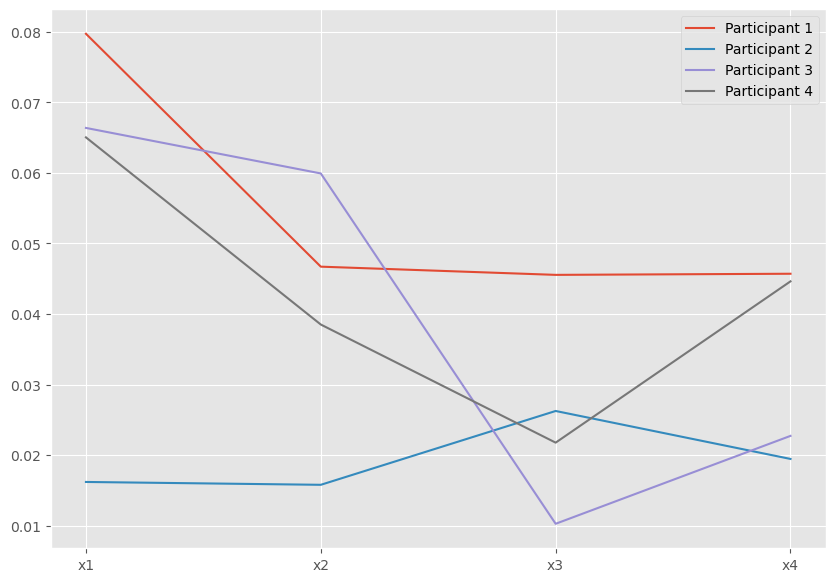

In [22]:
fig, ax = plt.subplots()  

# iterate over participants, the iteration variable is participant-id minus 1 

for participantid_m1 in range(samplesize):    
    # first construct filename for current participant
    # the filename consists of three parts: 1. "RecordingParicipant", 2. the participant index, 3. ".wav"
    partfilename = "RecordingParticipant%d"%(participantid_m1+1)
    # construct full-path by concatenating path with filename
    fullfilename = pathbase+partfilename + ".wav"
    # check if file with given full-path exists
    if os.path.isfile(fullfilename):
        # load the recording from the wav file
        fs, data = wavfile.read(fullfilename)    
        # store the last N audio samples of the wav file in the numpy array audiosignal 
        audiosignal=data[-(fft_length+1):-1]  
        # compute absolute values of DFT of length-N signal  
        spectrum = np.abs(fft(audiosignal,fft_length))    
    else:
        # compute absolute values of fft with length N
        spectrum = np.zeros(fft_length)       
        print("no file")     
    if ((covid19field[participantid_m1]=="n")): 
        # set jth entry of numpy array `y` to -1 if j-th Individuals had been reported a Covid-19 infected
        y[participantid_m1]=-1          
    # construct feature vector by using spectrum values at frequencies 400,600,800,1000 
    featurevec = spectrum[frequency_bins]/np.max(spectrum) 
    # store feature vector for r-th participant in the r-1 th row of 'X'
    X[participantid_m1,:] = featurevec              
    # check if the current participant belongs to the first four participants
    if participantid_m1 in range(4): 
        # plot the feature vector entries for the participant 
        ax.plot(np.arange(len_freq_bins), featurevec,label="Participant %d" % (participantid_m1+1)) # plotting t, a separately 

ax.set_xticks(range(len(frequency_bins)))
ax.set_xticklabels(['x1','x2','x3','x4'])                      # add labels for histogram intervals using ax.set_xticklabels()
plt.legend()
plt.show()

# Estimator fitting: Logistic Regression

Edit y prior to doing the transform. The output is “+1” if the individual is likely to have a Covid-19 infection, otherwise the predictor map outputs "-1".

In [23]:
# replace instances of -1
y[y == -1] = 1
y = y.ravel()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(X, y, test_size=0.4, random_state=100)
features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [40]:
# Better validation strategy
clf_lr3 = LogisticRegression(random_state=124, C=100, class_weight="balanced")

#adjust C parameter maybe 100

clf_lr3.fit(features_train,labels_train)

clf_lr3.predict(features_validation_test)

clf_lr4 = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=30)

#change max_depth 4 and min_samples_split 25

clf_lr4.fit(features_train,labels_train)

clf_lr4.predict(features_validation_test)

print("trainset accuracy logistic regression: ", clf_lr3.score(features_train,labels_train))
print("testset accuracy logistic regression: ", clf_lr3.score(features_validation_test,labels_validation_test))

print("=" * 100)

print("trainset accuracy Decision Tree: ", clf_lr4.score(features_train,labels_train))
print("testset accuracy Decision Tree: ", clf_lr4.score(features_validation_test,labels_validation_test))

trainset accuracy logistic regression:  0.825
testset accuracy logistic regression:  0.8875
trainset accuracy Decision Tree:  0.825
testset accuracy Decision Tree:  0.7125


In [48]:
# normal scikit learn paradigm of specify, fit and predict for logistic regression or continuos perceptron
clf_lr1 = LogisticRegression(random_state=124, C=1000, class_weight="balanced")

#adjust C parameter maybe 100

clf_lr1.fit(X_train,y_train)

clf_lr1.predict(X_test)

clf_lr2 = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_split=30)

#change max_depth 4 and min_samples_split 25

clf_lr2.fit(X_train,y_train)

clf_lr2.predict(X_test)

print("trainset accuracy logistic regression: ", clf_lr1.score(X_train,y_train))
print("testset accuracy logistic regression: ", clf_lr1.score(X_test,y_test))

print("=" * 100)

print("trainset accuracy Decision Tree: ", clf_lr2.score(X_train,y_train))
print("testset accuracy Decision Tree: ", clf_lr2.score(X_test,y_test))

trainset accuracy logistic regression:  0.87
testset accuracy logistic regression:  0.81
trainset accuracy Decision Tree:  0.91
testset accuracy Decision Tree:  0.87


In [ ]:
# summary of notebook
# 1. load data
# 2. plot data
# 3. create feature vector
# 4. create target vector
# 5. split data into train and test
# 6. train model
# 7. predict on test data
# 8. evaluate model

Checked out the datasets that were provided and found that the data was not in the correct format. We had a simulated dataset of participants and their covid status. The data was in the form of a wav file and needed to be converted to a numpy array and then to a feature vector. The feature vector was then used to train the model. The accuracy of the model was then calculated and the model was evaluated. The accuracy of the model was between 0.87 and 0.91 which means that it is possible to create models to predict covid status from audio data.